In [10]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import glob
import numpy as np 
import IPython
import random

In [11]:
# Original data의 section

audio = "./data/blues.00001.wav"

data, sr = librosa.load(audio, sr=22050)

start_time = 0
end_time = 10

start_sample = sr * start_time
end_sample = sr * end_time

data = data[start_sample : end_sample]

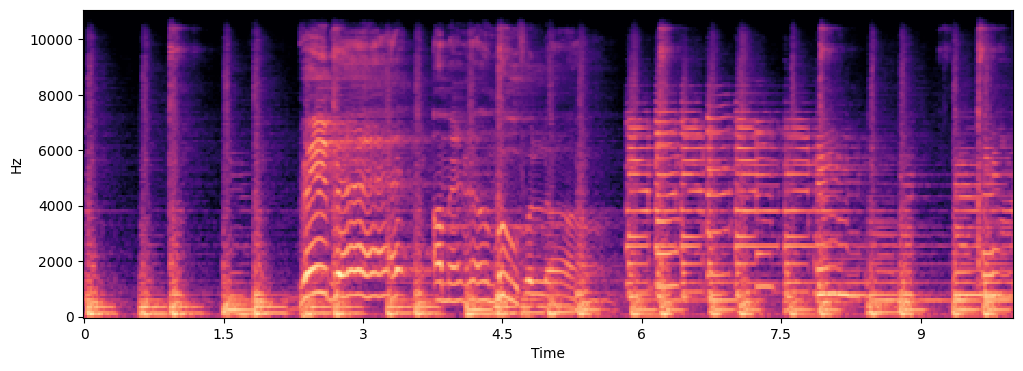

In [12]:
# mel spectrogram

stft = librosa.stft(data)

mel = librosa.feature.melspectrogram(S=abs(stft))

mel_db = librosa.amplitude_to_db(mel, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='hz')
plt.savefig("./result/mel_spectrogram2.png", bbox_inches='tight', pad_inches=0)

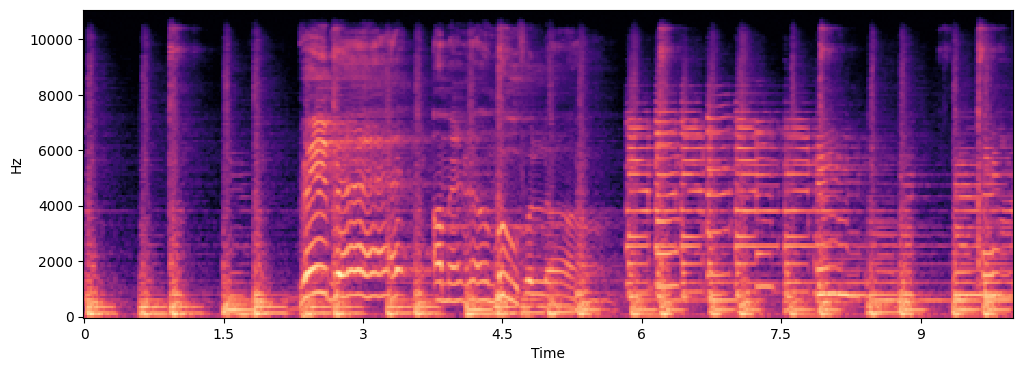

In [13]:
# noise

noise = 0.2 * np.random.randn(*mel_db.shape)
mel_db_noise = mel_db + noise

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_db_noise, sr=sr, x_axis='time', y_axis='hz')
plt.savefig("./result/mel_spectrogram2_noise.png", bbox_inches='tight', pad_inches=0)

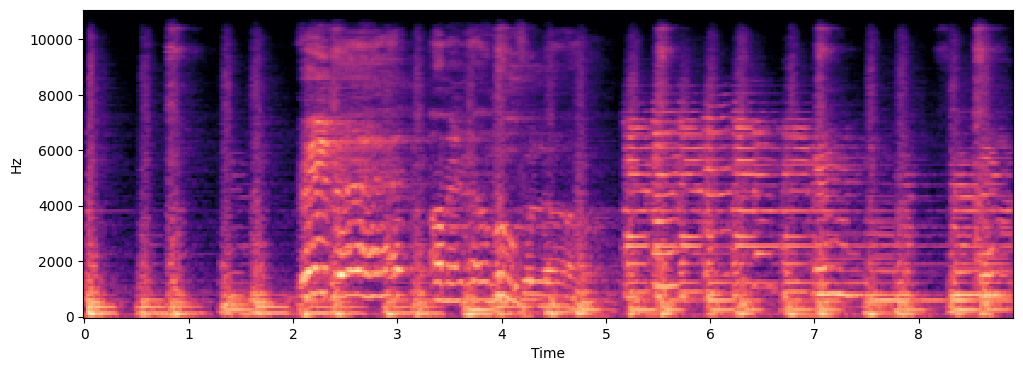

In [14]:
# stretched

rate = np.random.uniform(low = 0.8, high = 1.2)
data_stretch = librosa.effects.time_stretch(data, rate=rate)

stft_stretch = librosa.stft(data_stretch)

mel_stretch = librosa.feature.melspectrogram(S=abs(stft_stretch))

mel_stretch_db = librosa.amplitude_to_db(mel_stretch, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_stretch_db, sr=sr, x_axis='time', y_axis='hz')
plt.savefig("./result/mel_spectrogram2_stretch.png", bbox_inches='tight', pad_inches=0)